<a href="https://colab.research.google.com/github/pullz6/Valentine-s-Day-Consumer-Product-Analysis/blob/main/Valentine's_Day_consumer_prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/sample_data/Projects/Valentine-data/amazon_2024_valentines_best_sellers.csv")

Mounted at /content/drive


In [2]:
df.head()

,title,brand,description,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price,price/currency,price/value,categoryPageData/productPosition
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,Ferrero Rocher's milk chocolate gift box offer...,0.02,0.07,0.89,20021.0,NaN,$,11.39,7
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,This HERSHEY'S NUGGETS candy assortment is fil...,0.03,0.10,0.84,18891.0,NaN,$,10.69,16
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,Giving and receiving beautiful flowers is such...,0.01,0.05,0.92,19395.0,NaN,$,47.99,2
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,NaN,0.07,0.15,0.67,593.0,NaN,$,9.99,10
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,NaN,0.10,0.15,0.63,816.0,NaN,$,21.99,11


In [3]:
df.drop(['price','price/currency'], inplace = True, axis=1)

In [4]:
df['title'].str.contains('Chocolate')

0       True
1       True
2      False
3      False
4      False
       ...  
213    False
214    False
215    False
216    False
217    False
Name: title, Length: 218, dtype: bool

In [5]:
df['title'] = df['title'].str.replace('Valentines Day', '')
df['title'] = df['title'].str.replace('Valentine', '')
df['title'] = df['title'].str.replace('Day', '')
df['title'] = df['title'].str.replace('Gift', '')

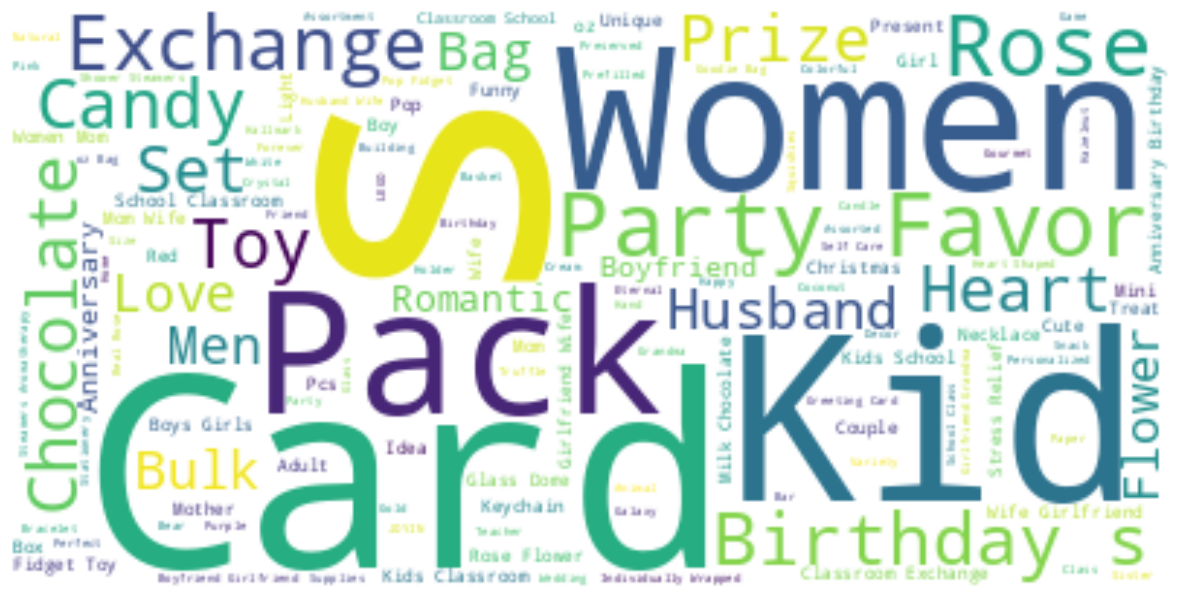

In [6]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt


text = " ".join(i for i in df.title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df['Type'] = np.where(df.title.str.contains(r'\b(Chocolate|chocolate)\b'), 'Chocolate', 'None')

<ipython-input-16-0f31961ae159>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Type'] = np.where(df.title.str.contains(r'\b(Chocolate|chocolate)\b'), 'Chocolate', 'Not Chocolate')


In [ ]:
df['Type'] = np.where(df.title.str.contains(r'\b(Chocolate|chocolate)\b'), 'Chocolate', 'Not Chocolate')

In [ ]:
#creating an attribute for the type of aircarft that a passenger is flying in
conditions = [
    df['title'].str.contains('|'.join(['Chocolate', 'chocolate'])) == True,
    df['title'].str.contains('|'.join(['Flowers', 'flowers'])) == True,
    df['title'].str.contains('|'.join(['Spa', 'Cream','Lotion','spa','cream','lotion','Shower','shower'])) == True,
    df['title'].str.contains('|'.join(['Stationery', 'stationery'])) == True,
    df['title'].str.contains('Card') == True
]
choices = ['Chocolate','Flowers','Skin Care','Stationery','Card']
df['Type'] = np.select(conditions, choices)
df['Type'] = df['Type'].str.replace('0', 'Other')

In [ ]:
df.head()

,title,brand,description,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/value,categoryPageData/productPosition,Type
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,Ferrero Rocher's milk chocolate gift box offer...,0.02,0.07,0.89,20021.0,11.39,7,Chocolate
1,"HERSHEY'S NUGGETS Assorted Chocolate, 's Cand...",HERSHEY'S,This HERSHEY'S NUGGETS candy assortment is fil...,0.03,0.10,0.84,18891.0,10.69,16,Chocolate
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,Giving and receiving beautiful flowers is such...,0.01,0.05,0.92,19395.0,47.99,2,Flowers
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,NaN,0.07,0.15,0.67,593.0,9.99,10,Skin Care
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,NaN,0.10,0.15,0.63,816.0,21.99,11,Skin Care


Type
Card          Axes(0.125,0.11;0.775x0.77)
Chocolate     Axes(0.125,0.11;0.775x0.77)
Flowers       Axes(0.125,0.11;0.775x0.77)
Other         Axes(0.125,0.11;0.775x0.77)
Skin Care     Axes(0.125,0.11;0.775x0.77)
Stationery    Axes(0.125,0.11;0.775x0.77)
dtype: object

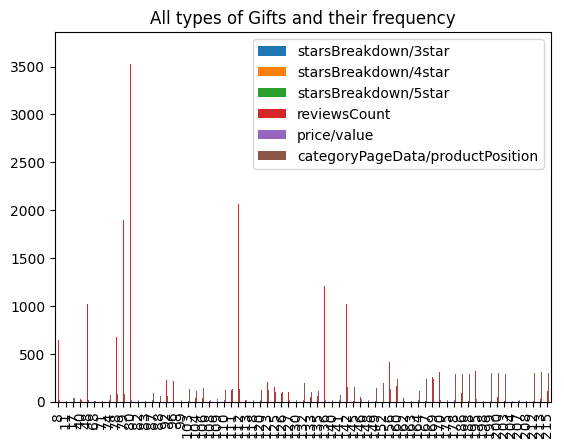

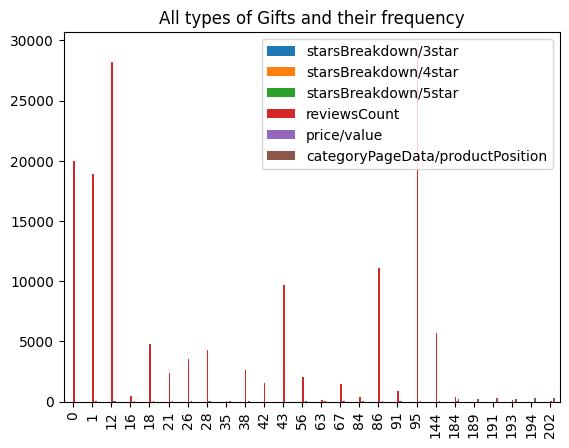

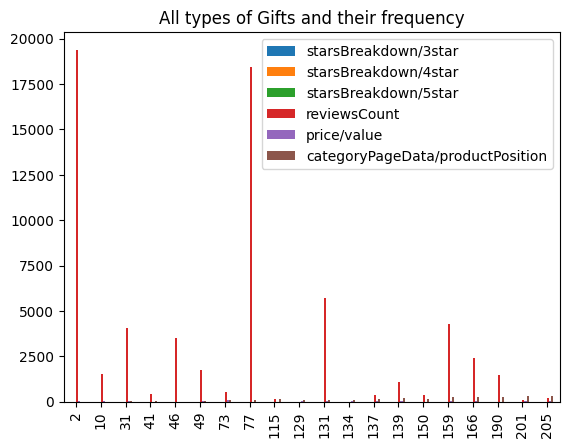

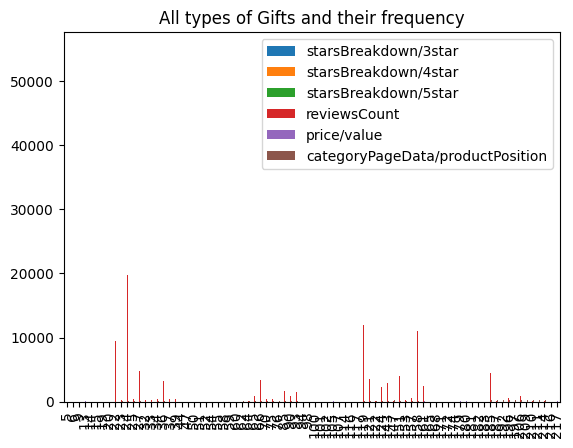

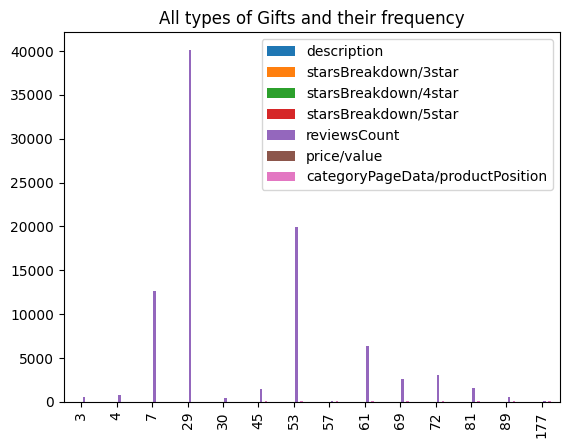

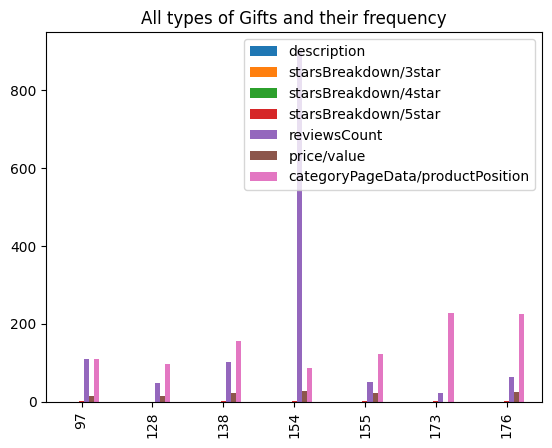

In [ ]:
 df.groupby("Type").plot(kind="bar", title="All types of Gifts and their frequency")